In [ ]:
# default_exp interpret

In [ ]:
# hide
import sys

sys.path.append("..")

# Interpret

> Interpret the results of a model

In [ ]:
# export
from fastseq.all import *
from fastseq.data.external import *
from fastai2.basics import *
from fastseq.models.nbeats import *

AttributeError: module 'fastseq.models.nbeats' has no attribute 'Block(units'

In [ ]:
items = dummy_data_generator(50,10, nrows=100)

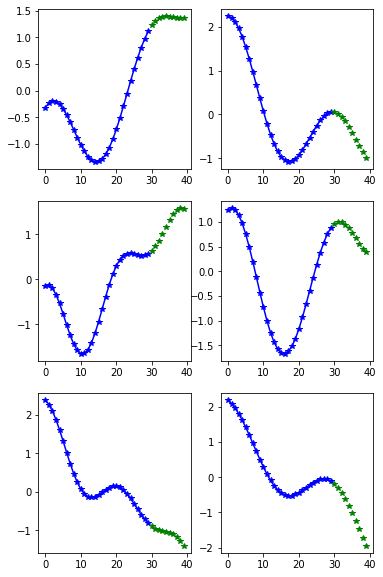

In [ ]:
dbunch = TSDataBunch.from_items(items, horizon = 10)
dbunch.show_batch(max_n=6)

In [ ]:
learn = dnn_learner(dbunch)

In [ ]:
learn.fit(1, .1)

epoch,train_loss,valid_loss,mae,smape,time
0,1.018427,2.178400,1.176072,161.842514,00:00


In [ ]:
#hide
class Interpretation():
    "Interpretation base class, can be inherited for task specific Interpretation classes"
    def __init__(self, dl, inputs, preds, targs, decoded, losses):
        store_attr(self, "dl,inputs,preds,targs,decoded,losses")

    @classmethod
    def from_learner(cls, learn, ds_idx=1, dl=None, act=None):
        "Construct interpretatio object from a learner"
        if dl is None: dl = learn.dbunch.dls[ds_idx]
        return cls(dl, *learn.get_preds(dl=dl, with_input=True, with_loss=True, with_decoded=True, act=None))

    def top_losses(self, k=None, largest=True):
        "`k` largest(/smallest) losses and indexes, defaulting to all losses (sorted by `largest`)."
        return self.losses.topk(ifnone(k, len(self.losses)), largest=largest)
    
    def plot_top_losses(self, k, largest=True, **kwargs):
        losses,idx = self.top_losses(k, largest)
        if not isinstance(self.inputs, tuple): self.inputs = (self.inputs,)
        if isinstance(self.inputs[0], Tensor): inps = tuple(o[idx] for o in self.inputs)
        else: inps = self.dl.create_batch(self.dl.before_batch([tuple(o[i] for o in self.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (self.targs if is_listy(self.targs) else (self.targs,)))
        x,y,its = self.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (self.decoded if is_listy(self.decoded) else (self.decoded,)))
        x1,y1,outs = self.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), self.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #its None means that a batch knos how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)

In [ ]:
from fastai2.interpret import *

In [ ]:
interp = TSInterpretation.from_learner(learn)

test_eq(interp.inputs, x)
test_eq(interp.targs, y)
out = learn.model.a * x + learn.model.b
test_eq(interp.preds, out)
test_eq(interp.losses, (out-y)[:,0]**2)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _th_equal

In [ ]:
# hide
from nbdev.export import *

notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 03_data.load.ipynb.
Converted 04_data.transforms.ipynb.
Converted 05_models.wavenet.ipynb.
Converted 06_models.dnn.ipynb.
Converted 08_metrics.ipynb.
Converted 09_learner.ipynb.
Converted 10_models.nbeats.ipynb.
Converted 20_models.cnn.learner.ipynb.
Converted 21_models.cnn.transforms.ipynb.
Converted index.ipynb.
